# Setting
* gamma=None for different kernels

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tflearn

from functions import PCA
from functions import kernelPCA
from functions import showConfusionMatrix
from functions import oneHotEncoder

%matplotlib inline

# USPS handwirtten digits dataset

In [2]:
# load the training and testing dataset
train = np.loadtxt('./data/zip.train')
test = np.loadtxt('./data/zip.test')

# get the feature and label information
train_feature = train[:, 1:]
train_label = train[:, 0]

test_feature = test[:, 1:]
test_label = test[:, 0]

# merge data together
data = np.append(train_feature, test_feature, axis=0)
labels = np.append(train_label, test_label)

print('Training set:\t', train_feature.shape)
print('Testing set:\t', test_feature.shape)
print('Overall set:\t', data.shape)

Training set:	 (7291, 256)
Testing set:	 (2007, 256)
Overall set:	 (9298, 256)


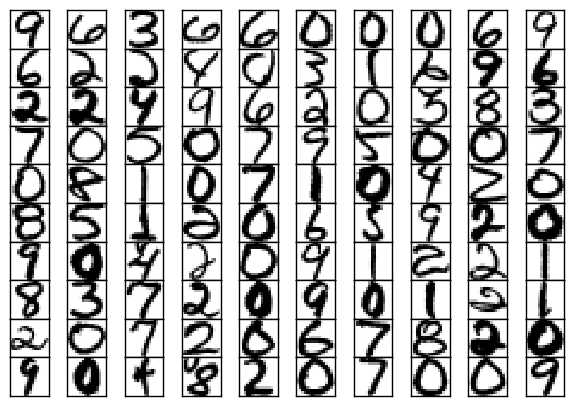

In [3]:
# reshape and viauslize the images
n = 10
imgs = np.reshape(test_feature[:100, :], (100, 16, 16))

fig, ax = plt.subplots(nrows=n, ncols=n)
for i in range(n):
    for j in range(n):
        ax[i, j].imshow(imgs[i * n + j, :, :], cmap=plt.cm.gray_r, interpolation='none')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].axis('image')
plt.tight_layout(pad=0.5, h_pad=0, w_pad=0, rect=None)

# fig.savefig('./result/usps_raw.png', dpi=300)
plt.show()

In [4]:
# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

## PCA

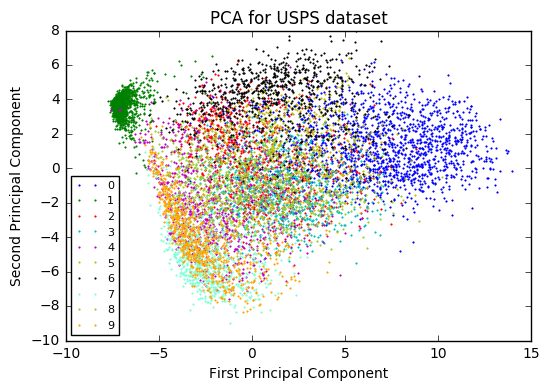

In [5]:
# compute eigenvalues and eigenvectors
eigvals, eigvecs, projection_pca = PCA(data)

# visualize the projections
fig, ax = plt.subplots()
for i in range(10):
    tmp = projection_pca[labels == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=2, label=str(i))

ax.set_title('PCA for USPS dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/usps_pca(2).png', dpi=300)
plt.show()

## Kernel PCA

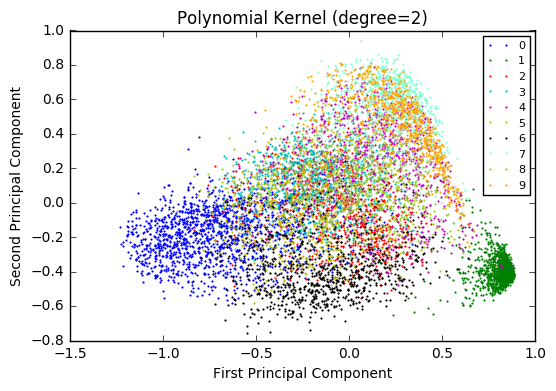

In [6]:
# 2 degree polynomial kernel
eigvals, eigvecs, projection_poly2 = kernelPCA(data, kernel='polynomial', degree=2, gamma=None)

# visualize the projections
fig, ax = plt.subplots()
for i in range(10):
    tmp = projection_poly2[labels == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=2, label=str(i))

ax.set_title('Polynomial Kernel (degree=2)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/usps_kpca_poly2(2).png', dpi=300)
plt.show()

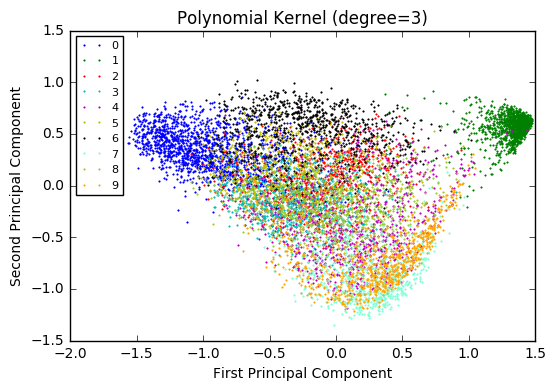

In [7]:
# 3 degree polynomial kernel
eigvals, eigvecs, projection_poly3 = kernelPCA(data, kernel='polynomial', degree=3, gamma=None)

# visualize the projections
fig, ax = plt.subplots()
for i in range(10):
    tmp = projection_poly3[labels == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=2, label=str(i))

ax.set_title('Polynomial Kernel (degree=3)')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/usps_kpca_poly3(2).png', dpi=300)
plt.show()

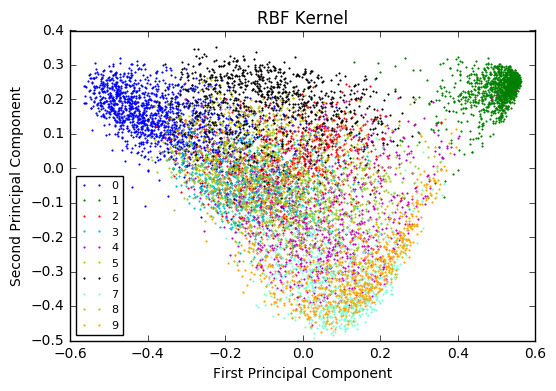

In [8]:
# rbf kernel
eigvals, eigvecs, projection_rbf = kernelPCA(data, kernel='rbf', gamma=None)

# visualize the projections
fig, ax = plt.subplots()
for i in range(10):
    tmp = projection_rbf[labels == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=2, label=str(i))

ax.set_title('RBF Kernel')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/usps_kpca_rbf(2).png', dpi=300)
plt.show()

# TensorFlow Neural Network

## Raw input image

In [9]:
train_x = train_feature
train_y = oneHotEncoder(train_label, 10)

test_x = test_feature
test_y =oneHotEncoder(test_label, 10)

# Classification using tflearn
with tf.Graph().as_default():
    tflearn.init_graph(num_cores=6, gpu_memory_fraction=0.8)

    # build the one-layer fully connected neural network
    net = tflearn.input_data(shape=[None, 256])
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

    # fit the model
    model = tflearn.DNN(net)
    model.fit(train_x, train_y)

    # predict on the training and test dataset
    train_prediction = np.array(model.predict(train_x))
    test_prediction = np.array(model.predict(test_x))

# get the label
train_pred_label = np.argmax(train_prediction, axis=1)
test_pred_label = np.argmax(test_prediction, axis=1)

# calculate the training and testing accuracy
train_acc = np.sum(train_pred_label == train_label) / len(train_label)
test_acc = np.sum(test_pred_label == test_label) / len(test_label)
print('Training Accuracy:\t', str(np.round(train_acc, 5)))
print('Testing Accuracy:\t', str(np.round(test_acc, 5)))

Training Step: 1140  | total loss: 0.23218
| Adam | epoch: 010 | loss: 0.23218 -- iter: 7291/7291
Training Step: 1140  | total loss: 0.23218
| Adam | epoch: 010 | loss: 0.23218 -- iter: 7291/7291
--
Training Accuracy:	 0.95817
Testing Accuracy:	 0.91231


## Images processed after PCA

Training Step: 1140  | total loss: 0.21776
| Adam | epoch: 010 | loss: 0.21776 -- iter: 7291/7291
Training Step: 1140  | total loss: 0.21776
| Adam | epoch: 010 | loss: 0.21776 -- iter: 7291/7291
--


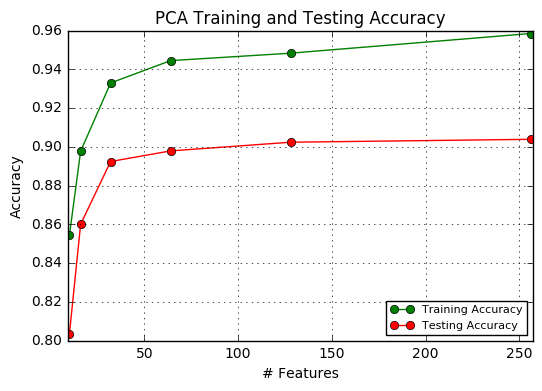

Number of Features:	 256
Training Accuracy:	 0.95844
[ 0.8542   0.89768  0.93293  0.94445  0.94829  0.95844]
Testing Accuracy:	 0.90384
[ 0.80319  0.85999  0.89238  0.89786  0.90234  0.90384]


In [10]:
train_acc_pca = []
test_acc_pca = []

train_y = oneHotEncoder(train_label, 10)
test_y =oneHotEncoder(test_label, 10)

n_features = [10, 16, 32, 64, 128, 256]
for n in n_features:
    train_x = projection_pca[:len(train_label), :n]
    test_x = projection_pca[len(train_label):, :n]
    
    # Classification using tflearn
    with tf.Graph().as_default():
        tflearn.init_graph(num_cores=6, gpu_memory_fraction=0.8)

        # build the one-layer fully connected neural network
        net = tflearn.input_data(shape=[None, n])
        net = tflearn.fully_connected(net, 10, activation='softmax')
        net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

        # fit the model
        model = tflearn.DNN(net)
        model.fit(train_x, train_y)

        # predict on the training and test dataset
        train_prediction = np.array(model.predict(train_x))
        test_prediction = np.array(model.predict(test_x))

    # get the label
    train_pred_label = np.argmax(train_prediction, axis=1)
    test_pred_label = np.argmax(test_prediction, axis=1)

    # calculate the training and testing accuracy
    train_acc = np.sum(train_pred_label == train_label) / len(train_label)
    test_acc = np.sum(test_pred_label == test_label) / len(test_label)
    train_acc_pca.append(train_acc)
    test_acc_pca.append(test_acc)

# plot the training and testing accuracy curve
fig, ax = plt.subplots()
ax.plot(n_features, train_acc_pca, 'go-', label='Training Accuracy')
ax.plot(n_features, test_acc_pca, 'ro-', label='Testing Accuracy')
ax.set_xlim((n_features[0]-1, n_features[-1]+1))
ax.set_title('PCA Training and Testing Accuracy')
ax.set_xlabel('# Features')
ax.set_ylabel('Accuracy')
ax.grid('on')
ax.legend(fontsize=8, loc=4)
fig.savefig('./result/usps_acc_pca(2).png', dpi=300)
plt.show()

# print the best result
index = np.argmax(test_acc_pca)
print('Number of Features:\t', n_features[index])
print('Training Accuracy:\t', str(np.round(train_acc_pca[index], 5)))
print(np.round(train_acc_pca, 5))
print('Testing Accuracy:\t', str(np.round(test_acc_pca[index], 5)))
print(np.round(test_acc_pca, 5))

## Images processed after Kernle PCA with degree=2

Training Step: 1140  | total loss: 0.95246
| Adam | epoch: 010 | loss: 0.95246 -- iter: 7291/7291
Training Step: 1140  | total loss: 0.95246
| Adam | epoch: 010 | loss: 0.95246 -- iter: 7291/7291
--


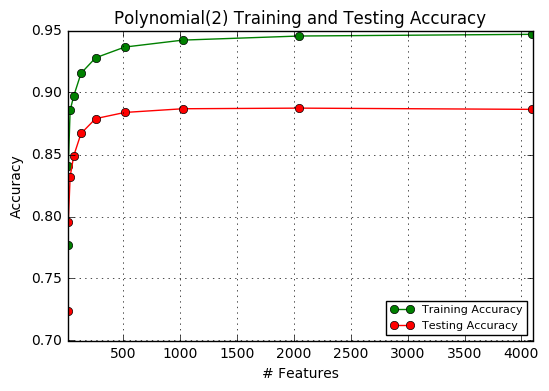

Number of Features:	 2048
Training Accuracy:	 0.94555
[ 0.77726  0.84035  0.88561  0.89727  0.91551  0.92799  0.93663  0.94226
  0.94555  0.94692]
Testing Accuracy:	 0.88739
[ 0.72397  0.79522  0.83209  0.84903  0.86697  0.87892  0.88391  0.8869
  0.88739  0.8864 ]


In [11]:
train_acc_kpca2 = []
test_acc_kpca2 = []

train_y = oneHotEncoder(train_label, 10)
test_y =oneHotEncoder(test_label, 10)

n_features = [10, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in n_features:
    train_x = projection_poly2[:len(train_label), :n]
    test_x = projection_poly2[len(train_label):, :n]
    
    # Classification using tflearn
    with tf.Graph().as_default():
        tflearn.init_graph(num_cores=6, gpu_memory_fraction=0.8)

        # build the one-layer fully connected neural network
        net = tflearn.input_data(shape=[None, n])
        net = tflearn.fully_connected(net, 10, activation='softmax')
        net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

        # fit the model
        model = tflearn.DNN(net)
        model.fit(train_x, train_y)

        # predict on the training and test dataset
        train_prediction = np.array(model.predict(train_x))
        test_prediction = np.array(model.predict(test_x))

    # get the label
    train_pred_label = np.argmax(train_prediction, axis=1)
    test_pred_label = np.argmax(test_prediction, axis=1)

    # calculate the training and testing accuracy
    train_acc = np.sum(train_pred_label == train_label) / len(train_label)
    test_acc = np.sum(test_pred_label == test_label) / len(test_label)
    train_acc_kpca2.append(train_acc)
    test_acc_kpca2.append(test_acc)

# plot the training and testing accuracy curve
fig, ax = plt.subplots()
ax.plot(n_features, train_acc_kpca2, 'go-', label='Training Accuracy')
ax.plot(n_features, test_acc_kpca2, 'ro-', label='Testing Accuracy')
ax.set_xlim((n_features[0]-1, n_features[-1]+1))
ax.set_title('Polynomial(2) Training and Testing Accuracy')
ax.set_xlabel('# Features')
ax.set_ylabel('Accuracy')
ax.grid('on')
ax.legend(fontsize=8, loc=4)
fig.savefig('./result/usps_acc_kpca2(2).png', dpi=300)
plt.show()

# print the best result
index = np.argmax(test_acc_kpca2)
print('Number of Features:\t', n_features[index])
print('Training Accuracy:\t', str(np.round(train_acc_kpca2[index], 5)))
print(np.round(train_acc_kpca2, 5))
print('Testing Accuracy:\t', str(np.round(test_acc_kpca2[index], 5)))
print(np.round(test_acc_kpca2, 5))

## Images processed after Kernle PCA with degree=3

Training Step: 1140  | total loss: 0.62289
| Adam | epoch: 010 | loss: 0.62289 -- iter: 7291/7291
Training Step: 1140  | total loss: 0.62289
| Adam | epoch: 010 | loss: 0.62289 -- iter: 7291/7291
--


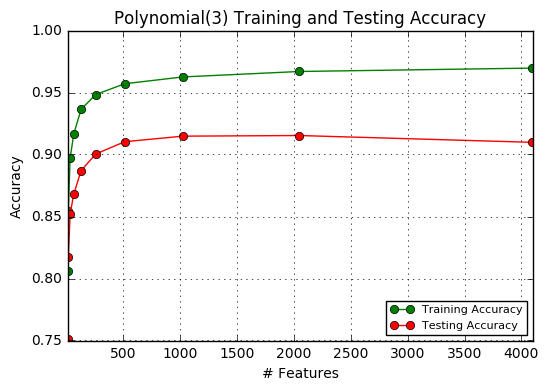

Number of Features:	 2048
Training Accuracy:	 0.96695
[ 0.80579  0.85475  0.89713  0.91647  0.93636  0.94829  0.95707  0.96256
  0.96695  0.96969]
Testing Accuracy:	 0.9153
[ 0.75137  0.81714  0.85202  0.86796  0.8869   0.90035  0.91031  0.9148
  0.9153   0.90982]


In [12]:
train_acc_kpca3 = []
test_acc_kpca3 = []

train_y = oneHotEncoder(train_label, 10)
test_y =oneHotEncoder(test_label, 10)

n_features = [10, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in n_features:
    train_x = projection_poly3[:len(train_label), :n]
    test_x = projection_poly3[len(train_label):, :n]
    
    # Classification using tflearn
    with tf.Graph().as_default():
        tflearn.init_graph(num_cores=6, gpu_memory_fraction=0.8)

        # build the one-layer fully connected neural network
        net = tflearn.input_data(shape=[None, n])
        net = tflearn.fully_connected(net, 10, activation='softmax')
        net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

        # fit the model
        model = tflearn.DNN(net)
        model.fit(train_x, train_y)

        # predict on the training and test dataset
        train_prediction = np.array(model.predict(train_x))
        test_prediction = np.array(model.predict(test_x))

    # get the label
    train_pred_label = np.argmax(train_prediction, axis=1)
    test_pred_label = np.argmax(test_prediction, axis=1)

    # calculate the training and testing accuracy
    train_acc = np.sum(train_pred_label == train_label) / len(train_label)
    test_acc = np.sum(test_pred_label == test_label) / len(test_label)
    train_acc_kpca3.append(train_acc)
    test_acc_kpca3.append(test_acc)

# plot the training and testing accuracy curve
fig, ax = plt.subplots()
ax.plot(n_features, train_acc_kpca3, 'go-', label='Training Accuracy')
ax.plot(n_features, test_acc_kpca3, 'ro-', label='Testing Accuracy')
ax.set_xlim((n_features[0]-1, n_features[-1]+1))
ax.set_title('Polynomial(3) Training and Testing Accuracy')
ax.set_xlabel('# Features')
ax.set_ylabel('Accuracy')
ax.grid('on')
ax.legend(fontsize=8, loc=4)
fig.savefig('./result/usps_acc_kpca3(2).png', dpi=300)
plt.show()

# print the best result
index = np.argmax(test_acc_kpca3)
print('Number of Features:\t', n_features[index])
print('Training Accuracy:\t', str(np.round(train_acc_kpca3[index], 5)))
print(np.round(train_acc_kpca3, 5))
print('Testing Accuracy:\t', str(np.round(test_acc_kpca3[index], 5)))
print(np.round(test_acc_kpca3, 5))

## Images processed after Kernle PCA with rbf kernel

Training Step: 1140  | total loss: 1.32863
| Adam | epoch: 010 | loss: 1.32863 -- iter: 7291/7291
Training Step: 1140  | total loss: 1.32863
| Adam | epoch: 010 | loss: 1.32863 -- iter: 7291/7291
--


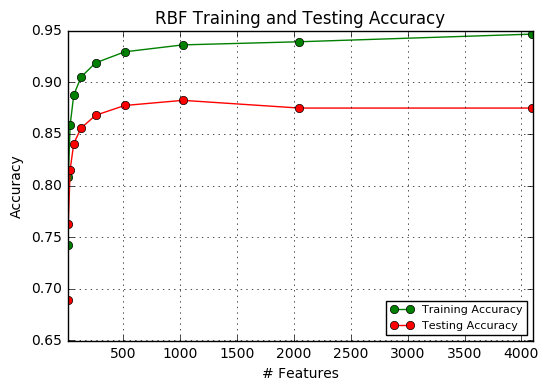

Number of Features:	 1024
Training Accuracy:	 0.93609
[ 0.74256  0.80798  0.85832  0.88753  0.90495  0.91867  0.92936  0.93609
  0.9391   0.94651]
Testing Accuracy:	 0.88241
[ 0.68909  0.76233  0.81515  0.84056  0.85551  0.86796  0.87743  0.88241
  0.87494  0.87494]


In [13]:
train_acc_rbf = []
test_acc_rbf = []

train_y = oneHotEncoder(train_label, 10)
test_y =oneHotEncoder(test_label, 10)

n_features = [10, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
for n in n_features:
    train_x = projection_rbf[:len(train_label), :n]
    test_x = projection_rbf[len(train_label):, :n]
    
    # Classification using tflearn
    with tf.Graph().as_default():
        tflearn.init_graph(num_cores=6, gpu_memory_fraction=0.8)

        # build the one-layer fully connected neural network
        net = tflearn.input_data(shape=[None, n])
        net = tflearn.fully_connected(net, 10, activation='softmax')
        net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

        # fit the model
        model = tflearn.DNN(net)
        model.fit(train_x, train_y)

        # predict on the training and test dataset
        train_prediction = np.array(model.predict(train_x))
        test_prediction = np.array(model.predict(test_x))

    # get the label
    train_pred_label = np.argmax(train_prediction, axis=1)
    test_pred_label = np.argmax(test_prediction, axis=1)

    # calculate the training and testing accuracy
    train_acc = np.sum(train_pred_label == train_label) / len(train_label)
    test_acc = np.sum(test_pred_label == test_label) / len(test_label)
    train_acc_rbf.append(train_acc)
    test_acc_rbf.append(test_acc)

# plot the training and testing accuracy curve
fig, ax = plt.subplots()
ax.plot(n_features, train_acc_rbf, 'go-', label='Training Accuracy')
ax.plot(n_features, test_acc_rbf, 'ro-', label='Testing Accuracy')
ax.set_xlim((n_features[0]-1, n_features[-1]+1))
ax.set_title('RBF Training and Testing Accuracy')
ax.set_xlabel('# Features')
ax.set_ylabel('Accuracy')
ax.grid('on')
ax.legend(fontsize=8, loc=4)
fig.savefig('./result/usps_acc_rbf(2).png', dpi=300)
plt.show()

# print the best result
index = np.argmax(test_acc_rbf)
print('Number of Features:\t', n_features[index])
print('Training Accuracy:\t', str(np.round(train_acc_rbf[index], 5)))
print(np.round(train_acc_rbf, 5))
print('Testing Accuracy:\t', str(np.round(test_acc_rbf[index], 5)))
print(np.round(test_acc_rbf, 5))